In [3]:
printmd('PYTORCH and KERAS Regression Model Comparision')
printmd('Principal Componenet Analysis, Correlation Analysis and')
printmd('Regression Models to predict US Nationals monthly expenditure for home mortgage loans;')
printmd('R Squared values 99.13 for PYTORCH and 99.07 for KERAS models.')


## <span style="color:blue">PYTORCH and KERAS Regression Model Comparision</span>

## <span style="color:blue">Principal Componenet Analysis, Correlation Analysis and</span>

## <span style="color:blue">Regression Models to predict US Nationals monthly expenditure for home mortgage loans;</span>

## <span style="color:blue">R Squared values 99.13 for PYTORCH and 99.07 for KERAS models.</span>

In [4]:
################################################################################################################################
# Import some of the required libraries like pandas, matplotlib,seaborn, numpy etc
################################################################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:blue">'+string+'</span>'))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
import time

In [5]:
################################################################################################################################
# read the input train csv file
################################################################################################################################
RE_train = pd.read_csv('./dataset/train.csv ')

In [6]:
################################################################################################################################
# read the input test file as well
################################################################################################################################
RE_test = pd.read_csv('./dataset/test.csv ')

In [7]:
################################################################################################################################
# check the shapes of the test and train files to know the number of rows and columns
################################################################################################################################
RE_train.shape, RE_test.shape

((27321, 80), (11709, 80))

In [8]:
################################################################################################################################
# look at the first 20 columns values of top 5 rows
################################################################################################################################
RE_train.iloc[0:2,0:20]

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284


In [9]:
################################################################################################################################
# look at the next 20 columns values of top 5 rows
################################################################################################################################
RE_train.iloc[0:2,20:40]

,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples
0,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0
1,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0


In [10]:
################################################################################################################################
# look at the next 20 columns values of top 5 rows
################################################################################################################################
RE_train.iloc[0:2,40:60]

,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf
0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658
1,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174


In [11]:
################################################################################################################################
# look at the remaining columns values of top 5 rows
################################################################################################################################
RE_train.iloc[0:2,60:]

,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.0,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
1,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.0,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [12]:
################################################################################################################################
# Remove all rows that have null values in hc_mortgage_mean as we don't use them in our model for prediction. They are loan rows
################################################################################################################################
RE_train=RE_train[~RE_train.filter(like='hc_mortgage_mean').isnull().any(1)] 
RE_train.shape   

(26748, 80)

In [13]:
################################################################################################################################
# to do the same on test file, first look at it shape to see how many will get dropped
################################################################################################################################
RE_test.shape

(11709, 80)

In [14]:
################################################################################################################################
# drop rows with null values in hc_mortgage_mean as we did for train dataset, and observe how many got dropped
################################################################################################################################
RE_test=RE_test[~RE_test.filter(like='hc_mortgage_mean').isnull().any(1)] 
RE_test.shape   

(11441, 80)

In [15]:
################################################################################################################################
# deleted the column BLOCKED all together as it is empty
################################################################################################################################
RE_train.drop(['BLOCKID'],axis=1,inplace=True)

In [16]:
################################################################################################################################
# extract all filed names that has null values from train dataset
################################################################################################################################
RE_NULL_COLS = [col for col in RE_train.columns if (RE_train[col].isnull().sum()!=0 )]

In [17]:
################################################################################################################################
# extract all rows that has null values
################################################################################################################################
RE_NULL_COL_DATA = RE_train[RE_NULL_COLS]

In [18]:
################################################################################################################################
# print the number of columns that has null values
################################################################################################################################
len(RE_NULL_COLS), RE_NULL_COL_DATA.shape, RE_NULL_COL_DATA.size, RE_train.size

(34, (26748, 34), 909432, 2113092)

In [19]:
printmd('Several fields from train and test files have null values')

## <span style="color:blue">Several fields from train and test files have null values</span>

In [20]:
################################################################################################################################
# Drop duplicate rows. Before that look at the shape one more time to see how many get deopped
################################################################################################################################
RE_train.shape

(26748, 79)

In [21]:
################################################################################################################################
# drop duplicate rows
################################################################################################################################
RE_train.drop_duplicates(inplace=True)

In [22]:
################################################################################################################################
# check the shape again to see how many got dropped
################################################################################################################################
RE_train.shape

(26719, 79)

In [23]:
################################################################################################################################
# check the unique values in UID colummn- if it has same unique values as number of rows, we can use it as an index column
################################################################################################################################
RE_train['UID'].nunique()

26719

In [24]:
printmd('UID field can be used as index as its nunique value equals number of rows in the file')

## <span style="color:blue">UID field can be used as index as its nunique value equals number of rows in the file</span>

In [25]:
################################################################################################################################
# Set UID as index to the dataset
################################################################################################################################
RE_train=RE_train.set_index('UID')

In [26]:
################################################################################################################################
# check the fill rate of columns that has nulll values
################################################################################################################################
for col in RE_NULL_COLS:
    print(f'Fill rate of column {str.center(col, 28) }   with missing values is {round(1-(len(RE_train[col].dropna()) / len(RE_train)),4):.5f} ' )

Fill rate of column          rent_mean             with missing values is 0.00100 
Fill rate of column         rent_median            with missing values is 0.00100 
Fill rate of column          rent_stdev            with missing values is 0.00100 
Fill rate of column      rent_sample_weight        with missing values is 0.00100 
Fill rate of column         rent_samples           with missing values is 0.00100 
Fill rate of column          rent_gt_10            with missing values is 0.00100 
Fill rate of column          rent_gt_15            with missing values is 0.00100 
Fill rate of column          rent_gt_20            with missing values is 0.00100 
Fill rate of column          rent_gt_25            with missing values is 0.00100 
Fill rate of column          rent_gt_30            with missing values is 0.00100 
Fill rate of column          rent_gt_35            with missing values is 0.00100 
Fill rate of column          rent_gt_40            with missing values is 0.00100 
Fill

In [27]:
printmd('Fill rate of all fields with missing data is very low, almost equal to zero ')

## <span style="color:blue">Fill rate of all fields with missing data is very low, almost equal to zero </span>

In [28]:
################################################################################################################################
# extract fields with less unique values to impute in a different way than those with more unique values. 
################################################################################################################################
cols_with_low_unique=[]
cols = [col for col in RE_train.columns]
for col,type in RE_train.loc[:, cols].dtypes.iteritems():
    if ((RE_train[col].isnull().sum() != 0 ) & (RE_train[col].nunique() < 10000)):
        cols_with_low_unique.append(col)    
len(cols_with_low_unique)

9

In [29]:
################################################################################################################################
# extract fields with more unique values to impute in a different way than those with less unique values.
################################################################################################################################
cols_with_high_unique=[]
cols = [col for col in RE_train.columns]
for col,type in RE_train.loc[:, cols].dtypes.iteritems():
    if ((RE_train[col].isnull().sum() != 0 ) & (RE_train[col].nunique() >= 10000)):
        cols_with_high_unique.append(col) 
len(cols_with_high_unique)

25

In [30]:
################################################################################################################################
# Initially I thought of imputing by mean, meadian or mode way. But now decided to impute by backfill and forward fill instead
################################################################################################################################
for col in cols_with_low_unique:
    
    if RE_train[col].isnull().sum() != 0:
        
        RE_train[[col]] = RE_train[[col]].bfill()
        

In [31]:
################################################################################################################################
# Initially I thought of imputeing by mean, meadian or mode way. But now decided to impute by backfill and forward fill instead
################################################################################################################################
for col in cols_with_high_unique:
    
    if RE_train[col].isnull().sum() != 0:
        
        RE_train[[col]] = RE_train[[col]].ffill()
        

In [32]:
################################################################################################################################
# import the MinMaxScaler to standardize the data
################################################################################################################################
from sklearn.preprocessing import MinMaxScaler

In [33]:
################################################################################################################################
# instantiate the MinMaxScaler
################################################################################################################################
scaler = MinMaxScaler()

In [34]:
################################################################################################################################
# extract the required variables for performing the correlation analysis
################################################################################################################################
RE_train_CA =RE_train[['STATEID','pop','rent_mean','hi_mean','family_mean','hc_mortgage_mean','hc_mean',\
                       'divorced','separated','married','pct_own','hs_degree','debt','home_equity','second_mortgage',\
                       'home_equity_second_mortgage']]

In [35]:
################################################################################################################################
# fit transform the data for coreelation analysis
################################################################################################################################
RE_train_CA_scaled = scaler.fit_transform(RE_train_CA)

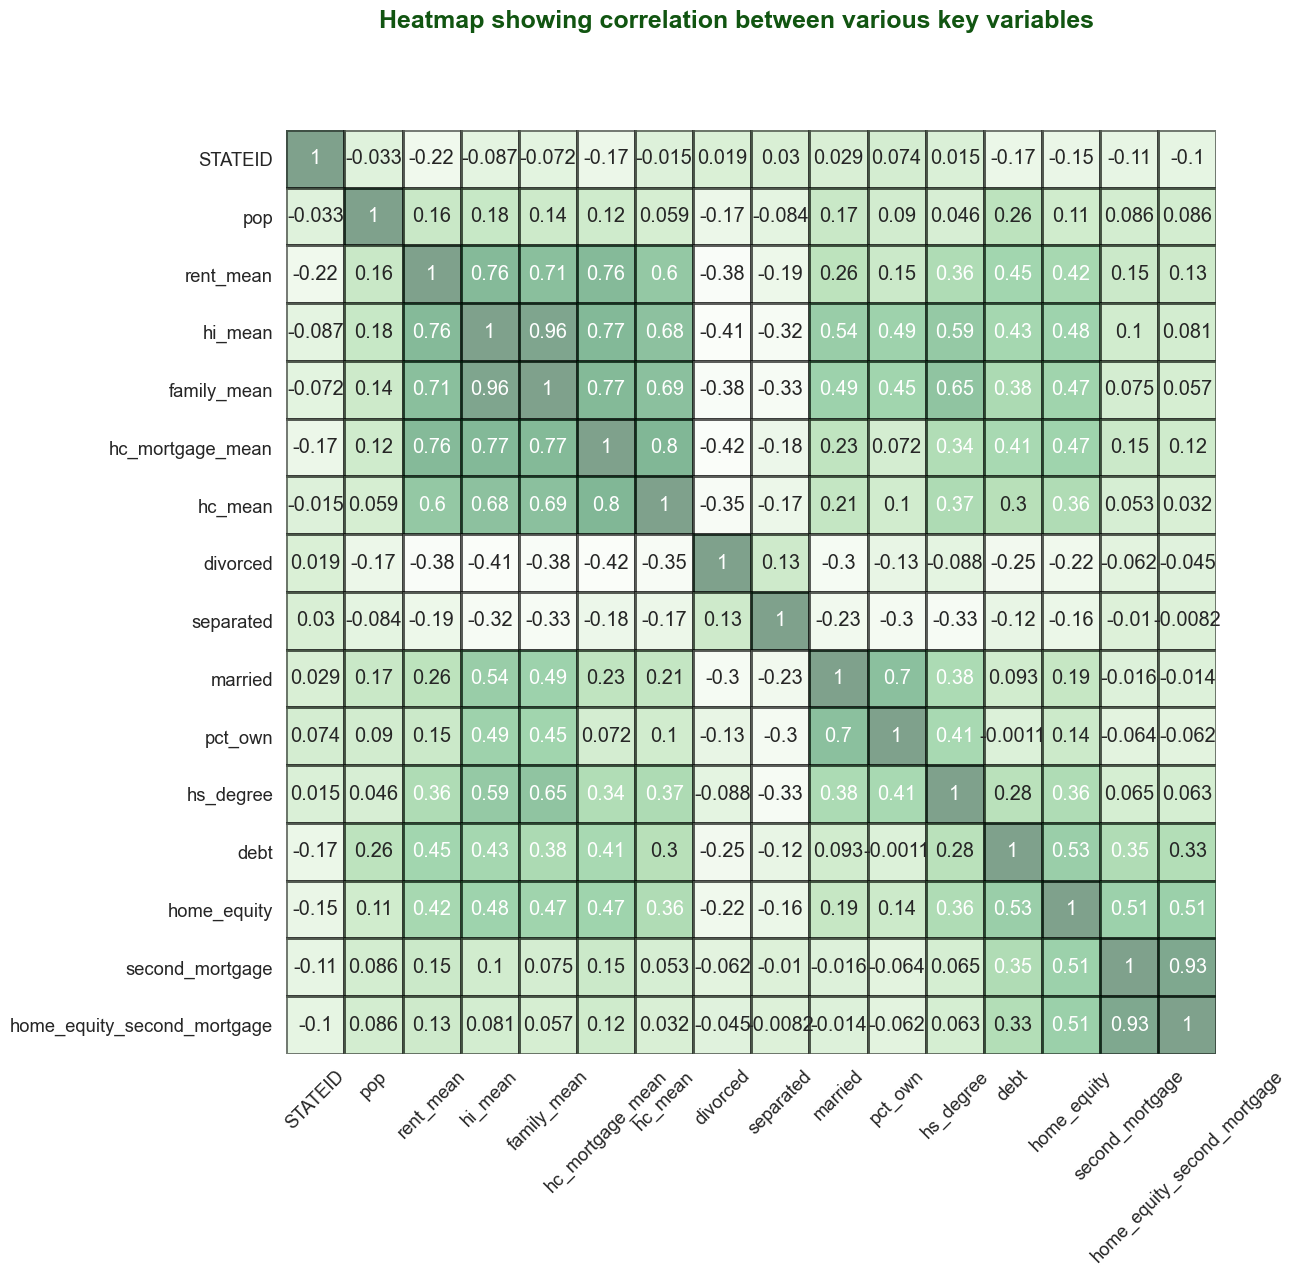

In [36]:
################################################################################################################################
# execute the correlation function on the standardized data, and plot the heatmap of that data
################################################################################################################################
corr = RE_train_CA.corr()
plt.figure(figsize=(12,12))
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
sns.heatmap(corr,annot=True,cbar=False,fmt='.2g',cmap=plt.cm.Greens,
    linewidths=2,
    linecolor='black',alpha=.5)
plt.suptitle('Heatmap showing correlation between various key variables',fontweight='bold',color='#115511',fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [37]:
printmd('second_mortgage and home_equity_second_mortgage are highly correlated')
printmd('rent_mean, hi_mean,family_mean ,hc_mortgage_mean and hc_mean are highly correlated')
printmd('married and pct_own are coupled')
printmd('hs_degree, hi_mean and family_mean are coupled')
printmd('divorced,separated has negative relationship with hi_mean and family_mean')
printmd('second_mortgage, home_equity and home_equity_second_mortgage are correlated with a significant value')
printmd('debt, rent_mean, hi_mean, family_mean,home_equity, second_mortgage and hc_mortgage_mean are coupled ')

## <span style="color:blue">second_mortgage and home_equity_second_mortgage are highly correlated</span>

## <span style="color:blue">rent_mean, hi_mean,family_mean ,hc_mortgage_mean and hc_mean are highly correlated</span>

## <span style="color:blue">married and pct_own are coupled</span>

## <span style="color:blue">hs_degree, hi_mean and family_mean are coupled</span>

## <span style="color:blue">divorced,separated has negative relationship with hi_mean and family_mean</span>

## <span style="color:blue">second_mortgage, home_equity and home_equity_second_mortgage are correlated with a significant value</span>

## <span style="color:blue">debt, rent_mean, hi_mean, family_mean,home_equity, second_mortgage and hc_mortgage_mean are coupled </span>

In [38]:
printmd('End of Exploratory Data Analysis.')

## <span style="color:blue">End of Exploratory Data Analysis.</span>

In [39]:
printmd('Start of Data Preprocessing.')

## <span style="color:blue">Start of Data Preprocessing.</span>

In [40]:
################################################################################################################################
# drop the BLOCKED field as it has no data from the test file as we did for the training dataset
################################################################################################################################
RE_test.drop(['BLOCKID'],axis=1,inplace=True)

In [41]:
################################################################################################################################
# extarct column names of columns with null values from the test dataset
################################################################################################################################
RE_NULL_COLS = [col for col in RE_test.columns if (RE_test[col].isnull().sum()!=0 )]
RE_NULL_COL_DATA = RE_test[RE_NULL_COLS]
len(RE_NULL_COLS)


29

In [42]:
################################################################################################################################
# check the shape of the test dataset before droping the duplicate rows for comparision sake
################################################################################################################################
RE_test.shape

(11441, 79)

In [43]:
################################################################################################################################
# drop duplicates from test dataset
################################################################################################################################
RE_test.drop_duplicates(inplace=True)
RE_test.shape


(11432, 79)

In [44]:
################################################################################################################################
# set the UID field as index as we did for the training dataset
################################################################################################################################
RE_test=RE_test.set_index('UID')

In [45]:
################################################################################################################################
# find the null fill rate of columns with null values 
################################################################################################################################
for col in RE_NULL_COLS:
    print(f'Fill rate of column{str.center(col, 28)} with missing values is  {round(1-(len(RE_test[col].dropna()) / len(RE_test)),4)}')

Fill rate of column         rent_mean           with missing values is  0.0017
Fill rate of column        rent_median          with missing values is  0.0017
Fill rate of column         rent_stdev          with missing values is  0.0017
Fill rate of column     rent_sample_weight      with missing values is  0.0017
Fill rate of column        rent_samples         with missing values is  0.0017
Fill rate of column         rent_gt_10          with missing values is  0.0017
Fill rate of column         rent_gt_15          with missing values is  0.0017
Fill rate of column         rent_gt_20          with missing values is  0.0017
Fill rate of column         rent_gt_25          with missing values is  0.0017
Fill rate of column         rent_gt_30          with missing values is  0.0017
Fill rate of column         rent_gt_35          with missing values is  0.0017
Fill rate of column         rent_gt_40          with missing values is  0.0017
Fill rate of column         rent_gt_50          with

In [46]:
printmd('Fill rate of testing dataset is also very low; as it was with the training dataset')

## <span style="color:blue">Fill rate of testing dataset is also very low; as it was with the training dataset</span>

In [47]:
################################################################################################################################
# initially i thought of imputeing by mean, median and mode way; but later decided to impute as backfill and forwardfill
# separate columns with nulls and less than 10000 unique values
################################################################################################################################
cols_with_low_unique=[]
cols = [col for col in RE_test.columns]
for col,type in RE_test.loc[:, cols].dtypes.iteritems():
    if ((RE_test[col].isnull().sum() != 0 ) & (RE_test[col].nunique() < 10000)):
        cols_with_low_unique.append(col)    
len(cols_with_low_unique)


16

In [48]:
################################################################################################################################
# extract columns with nulls and more than 10000 unique values
################################################################################################################################
cols_with_high_unique=[]
cols = [col for col in RE_test.columns]
for col,type in RE_test.loc[:, cols].dtypes.iteritems():
    if ((RE_test[col].isnull().sum() != 0 ) & (RE_test[col].nunique() >= 10000)):
        cols_with_high_unique.append(col) 
len(cols_with_high_unique)


13

In [49]:
################################################################################################################################
# impute low unique columns with backfill and high unique value columns with forwardfill - no specific reason 
################################################################################################################################
for col in cols_with_low_unique:
    
    if RE_test[col].isnull().sum() != 0:
        
        RE_test[[col]] = RE_test[[col]].bfill()
        
        
for col in cols_with_high_unique:
    
    if RE_test[col].isnull().sum() != 0:
        
        RE_test[[col]] = RE_test[[col]].ffill()


In [50]:
################################################################################################################################
# extract the catagory columns for label encoding to fit for machine learning model building
################################################################################################################################
objcols = RE_train.select_dtypes(exclude=np.number).columns 


In [51]:
################################################################################################################################
# instantiate different label encoder for different fields
################################################################################################################################
from sklearn.preprocessing import LabelEncoder

le_state    = LabelEncoder()
le_state_ab = LabelEncoder()
le_city     = LabelEncoder()
le_place    = LabelEncoder()
le_type     = LabelEncoder()
le_primary  = LabelEncoder() 

################################################################################################################################
# fit the label encoders with training dataset fields for respective encoder
################################################################################################################################


le_state.fit(RE_train.state)
le_state_ab.fit(RE_train.state_ab)
le_city.fit(RE_train.city)
le_place.fit(RE_train.place)
le_type.fit(RE_train.type)
le_primary.fit(RE_train.primary)

################################################################################################################################
# transform the label encoder on train dataset fields 
################################################################################################################################

RE_train.state       = le_state.transform(RE_train.state)
RE_train.state_ab    = le_state_ab.transform(RE_train.state_ab)
RE_train.city        = le_city.transform(RE_train.city)
RE_train.place       = le_place.transform(RE_train.place)
RE_train.type        = le_type.transform(RE_train.type)
RE_train.primary     = le_primary.transform(RE_train.primary)

In [52]:
################################################################################################################################
# there could be new/unseen labels in test dataset, which could error while encoding. To avoid that we check if there are any
# unseen labels in test dataset. If there are, then replace it with 'other' value.
################################################################################################################################
RE_test['state']     = RE_test['state'].map(lambda s: 'other' if s not in le_state.classes_ else s)
RE_test['state_ab']  = RE_test['state_ab'].map(lambda s: 'other' if s not in le_state_ab.classes_ else s)
RE_test['city']      = RE_test['city'].map(lambda s: 'other' if s not in le_city.classes_ else s)
RE_test['place']     = RE_test['place'].map(lambda s: 'other' if s not in le_place.classes_ else s)
RE_test['type']      = RE_test['type'].map(lambda s: 'other' if s not in le_type.classes_ else s)
RE_test['primary']   = RE_test['primary'].map(lambda s: 'other' if s not in le_primary.classes_ else s)


################################################################################################################################
# Add the 'other' value to all label encoding instances
################################################################################################################################

le_state.classes_    = np.append(le_state.classes_, 'other')
le_state_ab.classes_ = np.append(le_state_ab.classes_, 'other')
le_city.classes_     = np.append(le_city.classes_, 'other')
le_place.classes_    = np.append(le_place.classes_, 'other')
le_type.classes_     = np.append(le_type.classes_, 'other')
le_primary.classes_  = np.append(le_primary.classes_, 'other')

In [53]:
################################################################################################################################
# now run the label encoding transform on the test dataset fields 
################################################################################################################################
RE_test.state       = le_state.transform(RE_test.state)
RE_test.state_ab    = le_state_ab.transform(RE_test.state_ab)
RE_test.city        = le_city.transform(RE_test.city)
RE_test.place       = le_place.transform(RE_test.place)
RE_test.type        = le_type.transform(RE_test.type)
RE_test.primary     = le_primary.transform(RE_test.primary)

In [54]:
################################################################################################################################
# check null values in any of the columns in test dataset one last time
################################################################################################################################
for col in RE_test.columns:
    
    if RE_test[col].isnull().sum() != 0:
        print('col:',col)

In [55]:
printmd('Principal Component Analysis')

## <span style="color:blue">Principal Component Analysis</span>

In [56]:
################################################################################################################################
# prepare data for machine learning. seperate faetures and target variables
################################################################################################################################
Xtrain = RE_train.drop(['hc_mortgage_mean'],axis=1)
ytrain = RE_train['hc_mortgage_mean']
Xtrain.shape, ytrain.shape

((26719, 77), (26719,))

In [57]:
################################################################################################################################
# similarly do that for test dataset
################################################################################################################################
Xtest = RE_test.drop(['hc_mortgage_mean'],axis=1)
ytest = RE_test['hc_mortgage_mean']
Xtest.shape, ytest.shape

((11432, 77), (11432,))

In [58]:
################################################################################################################################
# prepare to standardize the training and testing features; fit on trainfeatures and transform on both datasets
################################################################################################################################
scaler = MinMaxScaler()
scaler.fit(Xtrain)
xtrain_scaled= scaler.transform(Xtrain)
xtest_scaled= scaler.transform(Xtest)

In [59]:
################################################################################################################################
# before performing PRINCIPAL COMPONENT ANALYSIS, look at the shape of the features file of train and test
################################################################################################################################
xtrain_scaled.shape, xtest_scaled.shape

((26719, 77), (11432, 77))

In [60]:
################################################################################################################################
# import the PCA module
################################################################################################################################
from sklearn.decomposition import PCA

In [61]:
################################################################################################################################
# instantiate the PCA to capture 99% of varaiance 
################################################################################################################################
pca = PCA(n_components=.99)

In [62]:
################################################################################################################################
# fit the PCA on the scaled train datasest
################################################################################################################################
pca.fit(xtrain_scaled)

PCA(n_components=0.99)

In [63]:
################################################################################################################################
# transform the PCA on train and test scaled files, and see how many components it returns that capture 99% varaiance
################################################################################################################################
xtestPCA = pca.transform(xtest_scaled)
xtrainPCA = pca.transform(xtrain_scaled)
xtestPCA.shape, xtrainPCA.shape

((11432, 37), (26719, 37))

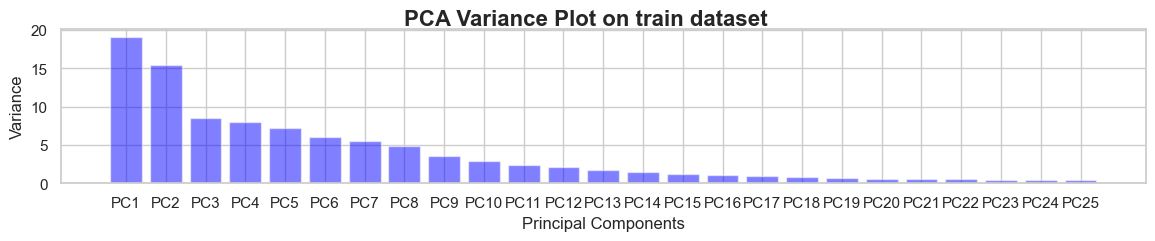

In [64]:
################################################################################################################################
# plot the Principal component variance on the train dataset only 25 components out of 37
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(14,2))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10',
           'PC11', 'PC12', 'PC13', 'PC14','PC15','PC16','PC17','PC18','PC19','PC20',
           'PC21', 'PC22', 'PC23', 'PC24','PC25']
plt.bar(x= range(1,26), height=percent_variance[0:25], 
        alpha=.5,tick_label=columns,color='blue')
plt.ylabel('Variance')
plt.xlabel('Principal Components')
plt.suptitle('PCA Variance Plot on train dataset',fontweight='bold',fontsize=16)
plt.show()


In [65]:
printmd('End of Data Pre Processing and PCA' )
printmd('Start of PYTORCH and KERAS Neural Network Model Building and Evaluation')

## <span style="color:blue">End of Data Pre Processing and PCA</span>

## <span style="color:blue">Start of PYTORCH and KERAS Neural Network Model Building and Evaluation</span>

In [66]:
################################################################################################################################
# import the regression metrics modules
################################################################################################################################
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [67]:
printmd('KERAS Neural Network Model')

## <span style="color:blue">KERAS Neural Network Model</span>

In [68]:
################################################################################################################################
# import the libraries for deep learning model building
################################################################################################################################
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model 
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization 
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()



In [69]:
################################################################################################################################
# build the deep learnig model and compile for health care data analysis 
################################################################################################################################
model = Sequential()
model.add(Input(shape=(37,)))

model.add(Dense(1024, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))  
model.add(BatchNormalization())
model.add(Dropout(.4))

model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001))) 
model.add(Dropout(.4))
model.add(BatchNormalization())

model.add(Dense(32, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001))) 
model.add(Dropout(.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1, activation=tf.nn.relu))

opt = Adam(lr=0.02,beta_1=0.5)  

model.compile(loss='mse', optimizer=opt, metrics=['mse'])

In [109]:
################################################################################################################################
# define the path for the trained model from local directory and also define the checkpoints on val_loss
################################################################################################################################
FILEPATH="./Weights/weights_RealEstate_Predictor_Dense1024.hdf5"
#FILEPATH="./Weights/weights_RealEstate_Predictor_Dense1024 - Copy.hdf5"

checkpoint = ModelCheckpoint(FILEPATH, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callback_list = [tqdm_callback, checkpoint]

In [110]:
################################################################################################################################
# load the trained model
################################################################################################################################
model = load_model(FILEPATH)
opt = Adam(lr=0.0000002,beta_1=0.9)

#0.00002 is the really really good/right learning rate for many projects

model.compile(loss='mse', optimizer=opt, metrics=[ 'mse'])

################################################################################################################################
# print the summary of the loaded module
################################################################################################################################
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              38912     
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [108]:
################################################################################################################################
# fit the built model and run it for 1500 epochs
################################################################################################################################
history = model.fit(xtrainPCA, ytrain, validation_data=(xtestPCA, ytest), callbacks=callback_list,    
                    batch_size=2600, epochs=50, verbose=0)    

Training:   0%|                                                                                0/50 ETA: ?s,  …

Epoch 1/50


0/11                                                                                                         E…


Epoch 00001: val_loss improved from inf to 3771.67627, saving model to ./Weights\weights_RealEstate_Predictor_Dense1024 - Copy.hdf5
Epoch 2/50


0/11                                                                                                         E…


Epoch 00002: val_loss did not improve from 3771.67627
Epoch 3/50


0/11                                                                                                         E…


Epoch 00003: val_loss did not improve from 3771.67627
Epoch 4/50


0/11                                                                                                         E…


Epoch 00004: val_loss did not improve from 3771.67627
Epoch 5/50


0/11                                                                                                         E…


Epoch 00005: val_loss did not improve from 3771.67627
Epoch 6/50


0/11                                                                                                         E…


Epoch 00006: val_loss did not improve from 3771.67627
Epoch 7/50


0/11                                                                                                         E…


Epoch 00007: val_loss did not improve from 3771.67627
Epoch 8/50


0/11                                                                                                         E…


Epoch 00008: val_loss did not improve from 3771.67627
Epoch 9/50


0/11                                                                                                         E…


Epoch 00009: val_loss did not improve from 3771.67627
Epoch 10/50


0/11                                                                                                         E…


Epoch 00010: val_loss did not improve from 3771.67627
Epoch 11/50


0/11                                                                                                         E…


Epoch 00011: val_loss did not improve from 3771.67627
Epoch 12/50


0/11                                                                                                         E…


Epoch 00012: val_loss did not improve from 3771.67627
Epoch 13/50


0/11                                                                                                         E…


Epoch 00013: val_loss did not improve from 3771.67627
Epoch 14/50


0/11                                                                                                         E…


Epoch 00014: val_loss did not improve from 3771.67627
Epoch 15/50


0/11                                                                                                         E…


Epoch 00015: val_loss did not improve from 3771.67627
Epoch 16/50


0/11                                                                                                         E…


Epoch 00016: val_loss did not improve from 3771.67627
Epoch 17/50


0/11                                                                                                         E…


Epoch 00017: val_loss did not improve from 3771.67627
Epoch 18/50


0/11                                                                                                         E…


Epoch 00018: val_loss did not improve from 3771.67627
Epoch 19/50


0/11                                                                                                         E…


Epoch 00019: val_loss did not improve from 3771.67627
Epoch 20/50


0/11                                                                                                         E…


Epoch 00020: val_loss did not improve from 3771.67627
Epoch 21/50


0/11                                                                                                         E…


Epoch 00021: val_loss did not improve from 3771.67627
Epoch 22/50


0/11                                                                                                         E…


Epoch 00022: val_loss did not improve from 3771.67627
Epoch 23/50


0/11                                                                                                         E…


Epoch 00023: val_loss did not improve from 3771.67627
Epoch 24/50


0/11                                                                                                         E…


Epoch 00024: val_loss did not improve from 3771.67627
Epoch 25/50


0/11                                                                                                         E…


Epoch 00025: val_loss did not improve from 3771.67627
Epoch 26/50


0/11                                                                                                         E…


Epoch 00026: val_loss did not improve from 3771.67627
Epoch 27/50


0/11                                                                                                         E…


Epoch 00027: val_loss did not improve from 3771.67627
Epoch 28/50


0/11                                                                                                         E…


Epoch 00028: val_loss did not improve from 3771.67627
Epoch 29/50


0/11                                                                                                         E…


Epoch 00029: val_loss did not improve from 3771.67627
Epoch 30/50


0/11                                                                                                         E…


Epoch 00030: val_loss did not improve from 3771.67627
Epoch 31/50


0/11                                                                                                         E…


Epoch 00031: val_loss did not improve from 3771.67627
Epoch 32/50


0/11                                                                                                         E…


Epoch 00032: val_loss did not improve from 3771.67627
Epoch 33/50


0/11                                                                                                         E…


Epoch 00033: val_loss did not improve from 3771.67627
Epoch 34/50


0/11                                                                                                         E…


Epoch 00034: val_loss did not improve from 3771.67627
Epoch 35/50


0/11                                                                                                         E…


Epoch 00035: val_loss did not improve from 3771.67627
Epoch 36/50


0/11                                                                                                         E…


Epoch 00036: val_loss did not improve from 3771.67627
Epoch 37/50


0/11                                                                                                         E…


Epoch 00037: val_loss did not improve from 3771.67627
Epoch 38/50


0/11                                                                                                         E…


Epoch 00038: val_loss did not improve from 3771.67627
Epoch 39/50


0/11                                                                                                         E…


Epoch 00039: val_loss did not improve from 3771.67627
Epoch 40/50


0/11                                                                                                         E…


Epoch 00040: val_loss did not improve from 3771.67627
Epoch 41/50


0/11                                                                                                         E…


Epoch 00041: val_loss did not improve from 3771.67627
Epoch 42/50


0/11                                                                                                         E…


Epoch 00042: val_loss did not improve from 3771.67627
Epoch 43/50


0/11                                                                                                         E…


Epoch 00043: val_loss did not improve from 3771.67627
Epoch 44/50


0/11                                                                                                         E…


Epoch 00044: val_loss did not improve from 3771.67627
Epoch 45/50


0/11                                                                                                         E…


Epoch 00045: val_loss did not improve from 3771.67627
Epoch 46/50


0/11                                                                                                         E…


Epoch 00046: val_loss did not improve from 3771.67627
Epoch 47/50


0/11                                                                                                         E…


Epoch 00047: val_loss did not improve from 3771.67627
Epoch 48/50


0/11                                                                                                         E…


Epoch 00048: val_loss did not improve from 3771.67627
Epoch 49/50


0/11                                                                                                         E…


Epoch 00049: val_loss did not improve from 3771.67627
Epoch 50/50


0/11                                                                                                         E…


Epoch 00050: val_loss did not improve from 3771.67627


In [111]:
################################################################################################################################
# extract the variables for accuracy and loss reporting
################################################################################################################################
train_loss, train_acc = model.evaluate(xtrainPCA, ytrain, verbose=0,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(xtestPCA, ytest, verbose=0,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))



0/835                                                                                              ETA: ?s - E…

0/358                                                                                              ETA: ?s - E…

Train Accu: 2676.716, Test Accu: 3723.452
Train Loss: 2678.035, Test Loss: 3724.771


In [74]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

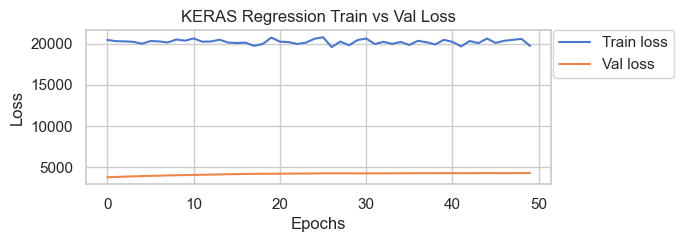

In [75]:
################################################################################################################################
# the below code is for plotting the loss curve of training and testing captured while training 
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('KERAS Regression Train vs Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.78, .55, 0.5, 0.5))
plt.show()

In [113]:
################################################################################################################################
# pridict on the split test dataset to calculate different error values
################################################################################################################################

y_Pred = model.predict(xtestPCA)

In [114]:
################################################################################################################################
# calcualate the r squared values for split test dataset
################################################################################################################################

R_squared = r2_score(ytest, y_Pred)
print("Deep Neural Network R-Squared: ", np.round(R_squared, 8))


Deep Neural Network R-Squared:  0.99074853


In [115]:
 y_Pred.shape,ytest.shape

((11432, 1), (11432,))

In [116]:
y_Pred= y_Pred.reshape(11432,)

In [117]:
################################################################################################################################
# pysically compare the true and predicted first 10 values
################################################################################################################################

pd.DataFrame({'Actual values ': ytest, 'Predicted values ': y_Pred}).head(10)


,Actual values,Predicted values
UID,,
255504,1139.24548,1140.379761
252676,1533.25988,1483.162354
276314,1254.54462,1224.515991
248614,862.65763,965.280823
286865,1996.41425,2026.218262
238666,2050.76604,2060.527832
240174,1598.17502,1570.657959
266241,2767.92928,2853.176270
224873,1168.36298,1257.117676


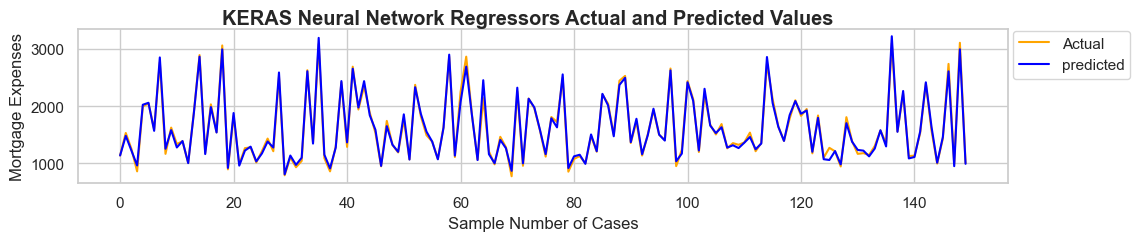

In [118]:
################################################################################################################################
# plot the graph of true and predicted values
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(12,2))
ax = range(len(ytest[0:150]))
plt.plot(ax, ytest[0:150], color='orange',label="Actual")
plt.plot(ax, y_Pred[0:150], color='blue',label="predicted")
plt.suptitle("KERAS Neural Network Regressors Actual and Predicted Values",fontweight='bold')
plt.xlabel('Sample Number of Cases')
plt.ylabel('Mortgage Expenses')
plt.legend(bbox_to_anchor=(0.64, .54, 0.5, 0.5))
plt.show()

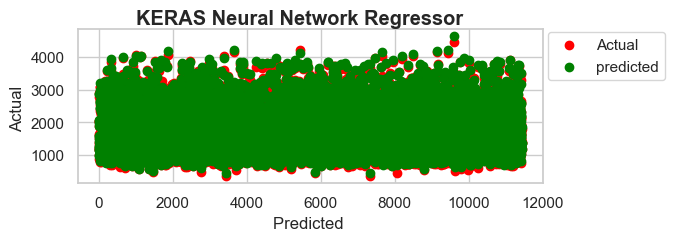

In [119]:
################################################################################################################################
# plot the Scatter plot of KERAS actualtrue and predicted values
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
ax = range(len(ytest))
ax1 = range(len(y_Pred))
plt.scatter(ax,ytest, color='red',label="Actual")
plt.scatter(ax1,y_Pred, color='green',label="predicted")
plt.suptitle("KERAS Neural Network Regressor ",fontweight='bold')
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
plt.legend(bbox_to_anchor=(0.78, .53, 0.5, 0.5))
plt.show()

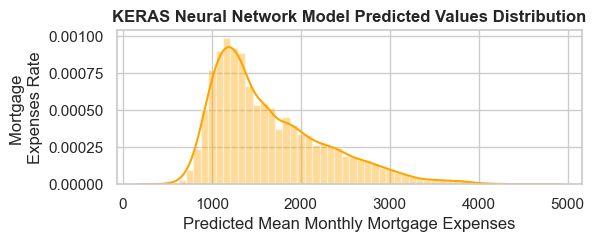

In [120]:
################################################################################################################################
# plot the predicted values distribution
################################################################################################################################
plt.figure(figsize=(6,2))
sns.distplot(y_Pred,color='orange',kde=True)
plt.title('KERAS Neural Network Model Predicted Values Distribution',fontweight='bold')
plt.xlabel('Predicted Mean Monthly Mortgage Expenses')
plt.ylabel('Mortgage \nExpenses Rate')
plt.show()

In [121]:
################################################################################################################################
# calculate the mean squared and root mean squared error values
################################################################################################################################
import math
print('KERAS Neural Network R2_Squared value is     : ', np.round(r2_score(ytest,y_Pred)*100,2))
print('KERAS Neural Network Mean Absolute Error     : ', np.round(mean_absolute_error(ytest,y_Pred),2))
print('KERAS Neural Network Mean Squared Error      : ', np.round(mean_squared_error(ytest,y_Pred),2))
print('KERAS Neural Network Root Mean Squared Error : ', np.round(math.sqrt(mean_squared_error(ytest,y_Pred)),2))


KERAS Neural Network R2_Squared value is     :  99.07
KERAS Neural Network Mean Absolute Error     :  42.18
KERAS Neural Network Mean Squared Error      :  3723.45
KERAS Neural Network Root Mean Squared Error :  61.02


In [85]:
printmd('KERAS Neural Network Model R Squared value is 99.07')

## <span style="color:blue">KERAS Neural Network Model R Squared value is 99.07</span>

In [86]:
printmd("PYTORCH Neural Network Model")

## <span style="color:blue">PYTORCH Neural Network Model</span>

In [87]:
################################################################################################################################
# import required modules for PYTORCH Model training and evaluating  
################################################################################################################################

from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import copy


In [88]:
################################################################################################################################
# convert features and target values to numpy arrays and float values as PYTORCH Model need them that way 
################################################################################################################################

X_train, y_train = np.array(xtrainPCA), np.array(ytrain)
X_test, y_test = np.array(xtestPCA), np.array(ytest)

y_train, y_test = y_train.astype(float), y_test.astype(float)

In [89]:
################################################################################################################################
# create train and test datasets for loader of PYTORCH Model
################################################################################################################################

class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())

test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [90]:
################################################################################################################################
# define the constants used by PYTORCH Model
################################################################################################################################

EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = X_train.shape[1]

In [91]:
################################################################################################################################
# create the train and test loaders for PYTORCH Model's training and evaluation
################################################################################################################################

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=16)

In [92]:
################################################################################################################################
# define the PYTORCH Neural Network Model with linear layers and Relu activation
################################################################################################################################

class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 74)
        self.layer_2 = nn.Linear(74, 148)
        self.layer_3 = nn.Linear(148, 74)
        self.layer_4 = nn.Linear(74, 37)
        self.layer_out = nn.Linear(37, 1)
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
            x = self.relu(self.layer_1(inputs))
            x = self.relu(self.layer_2(x))
            x = self.relu(self.layer_3(x))
            x = self.relu(self.layer_4(x))
            x = self.layer_out(x)
            return (x)
    def predict(self, test_inputs):
            x = self.relu(self.layer_1(test_inputs))
            x = self.relu(self.layer_2(x))
            x = self.relu(self.layer_3(x))
            x = self.relu(self.layer_4(x))
            x = self.layer_out(x)
            return (x)


In [93]:
################################################################################################################################
# to run using GPU's/CUDA if available else run on CPU
################################################################################################################################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [94]:
################################################################################################################################
# define the training and evaluating module
################################################################################################################################

def train_model(model, criterion, optimizer, scheduler,EPOCHS,best_loss=10e20):
    print("Begin training.")
    since = time.time()
    loss_stats = { 'train': [],     "test": [] }
    print('Best loss is : ', best_loss )
    for e in tqdm(range(1, EPOCHS+1)):
        print('-' * 125)
        train_epoch_loss = 0
        val_epoch_loss = 0
        best_model_wts = copy.deepcopy(model.state_dict())
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()
            y_train_pred = model(X_train_batch)
            train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
            train_loss.backward()
            optimizer.step()
            train_epoch_loss += train_loss.item()

        # VALIDATION    
        with torch.no_grad():
            val_epoch_loss = 0
            model.eval()
            for X_val_batch, y_val_batch in test_loader:
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
                y_val_pred = model(X_val_batch)
                val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
                val_epoch_loss += val_loss.item()

        if val_epoch_loss < best_loss:
            torch.save(model.state_dict(), './Weights/model_PYTORCH_REGRESSION.pth')
            print('-'*120)
            print('loss reduced from ', best_loss, ' to ', val_epoch_loss, ' ', time.ctime() )
            print('-'*120)
            best_loss = val_epoch_loss
            best_model_wts = copy.deepcopy(model.state_dict())

        scheduler.step()
        loss_stats['train'].append(train_epoch_loss/(len(train_loader)*train_loader.batch_size))
        loss_stats['test'].append(val_epoch_loss/(len(test_loader)*test_loader.batch_size))                              

        print(f'Epoch {e+0:03}/{EPOCHS+0:03}: | Train Loss: {train_epoch_loss/(len(train_loader)*train_loader.batch_size):.5f} \
        | Val Loss: {val_epoch_loss/(len(test_loader)*test_loader.batch_size):.5f}\
        | Val Epoch Loss: {val_epoch_loss :.8f}')
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_stats

In [95]:
################################################################################################################################
# Instantiate the Multiple regression PYTORCH Model
################################################################################################################################


model = MultipleRegression(NUM_FEATURES)
model.load_state_dict(torch.load('./Weights/model_PYTORCH_REGRESSION.pth'))
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

MultipleRegression(
  (layer_1): Linear(in_features=37, out_features=74, bias=True)
  (layer_2): Linear(in_features=74, out_features=148, bias=True)
  (layer_3): Linear(in_features=148, out_features=74, bias=True)
  (layer_4): Linear(in_features=74, out_features=37, bias=True)
  (layer_out): Linear(in_features=37, out_features=1, bias=True)
  (relu): ReLU()
)


In [96]:
################################################################################################################################
# Train the PYTORCH Model with optimer, lr scheduler and criterion defined 
################################################################################################################################

criterion = torch.nn.MSELoss()   
epochs = 50
optimizer = torch.optim.Adam(model.parameters(), lr=3.3929e-11,weight_decay=1e-3,amsgrad=True,betas=(0.6,.999)) 
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.965,verbose=1)

model,stat = train_model(model, criterion, optimizer, step_lr_scheduler,epochs,best_loss=2495557.023468) 


Adjusting learning rate of group 0 to 3.3929e-11.
Begin training.
Best loss is :  2495557.023468


  0%|          | 0/50 [00:00<?, ?it/s]

-----------------------------------------------------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 3.3929e-11.
Epoch 001/050: | Train Loss: 44.29904         | Val Loss: 218.14310        | Val Epoch Loss: 2495557.03494263
-----------------------------------------------------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 3.3929e-11.
Epoch 002/050: | Train Loss: 44.27754         | Val Loss: 218.14310        | Val Epoch Loss: 2495557.03482056
-----------------------------------------------------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 3.3929e-11.
Epoch 003/050: | Train Loss: 44.26877         | Val Loss: 218.14310        | Val Epoch Loss: 2495557.03408813
-----------------------------------------------------------------------------------------------------------------------------
Adjusting learni

Adjusting learning rate of group 0 to 2.6440e-11.
Epoch 030/050: | Train Loss: 44.24503         | Val Loss: 218.14310        | Val Epoch Loss: 2495557.04244995
-----------------------------------------------------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 2.6440e-11.
Epoch 031/050: | Train Loss: 44.27275         | Val Loss: 218.14310        | Val Epoch Loss: 2495557.03317261
-----------------------------------------------------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 2.5515e-11.
Epoch 032/050: | Train Loss: 44.27459         | Val Loss: 218.14310        | Val Epoch Loss: 2495557.02963257
-----------------------------------------------------------------------------------------------------------------------------
Adjusting learning rate of group 0 to 2.5515e-11.
Epoch 033/050: | Train Loss: 44.26053         | Val Loss: 218.14310        | Val Epoch Loss:

In [97]:
################################################################################################################################
# load the PYTORCH Model's best weights
################################################################################################################################

model = MultipleRegression(NUM_FEATURES)
model.load_state_dict(torch.load('./Weights/model_PYTORCH_REGRESSION.pth'))


<All keys matched successfully>

In [98]:
################################################################################################################################
# consolidate the actual and predicted values of PYTORCH into lists
################################################################################################################################

y_pred_list = []
y_test_list = []
with torch.no_grad():
    model.eval()
    for X_batch,y_test in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.extend(y_test_pred.cpu().numpy())
        y_test_list.extend(y_test.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_test_list = [a.squeeze().tolist() for a in y_test_list]

In [99]:
################################################################################################################################
# calculate the mean squared and root mean squared error values of PYTORCH Model
################################################################################################################################

print('PYTORCH Neural Network R2_Squared value is     : ', np.round(r2_score(y_test_list,y_pred_list)*100,2))
print('PYTORCH Neural Network Mean Absolute Error     : ', np.round(mean_absolute_error(y_test_list,y_pred_list),2))
print('PYTORCH Neural Network Mean Squared Error      : ', np.round(mean_squared_error(y_test_list,y_pred_list),2))
print('PYTORCH Neural Network Root Mean Squared Error : ', np.round(math.sqrt(mean_squared_error(y_test_list,y_pred_list)),2))


PYTORCH Neural Network R2_Squared value is     :  99.13
PYTORCH Neural Network Mean Absolute Error     :  40.9
PYTORCH Neural Network Mean Squared Error      :  3491.54
PYTORCH Neural Network Root Mean Squared Error :  59.09


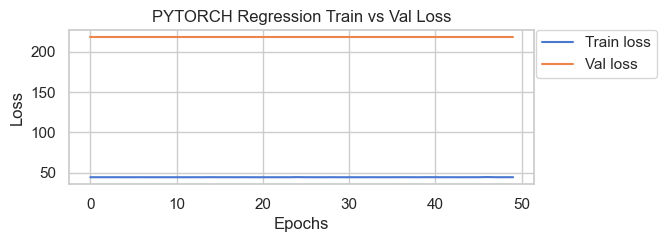

In [100]:
################################################################################################################################
# the below code is for plotting the loss curve of training and testing captured while training 
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(stat['train'], label='Train loss')
plt.plot(stat['test'], label='Val loss')
plt.title('PYTORCH Regression Train vs Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.78, .55, 0.5, 0.5))
plt.show()

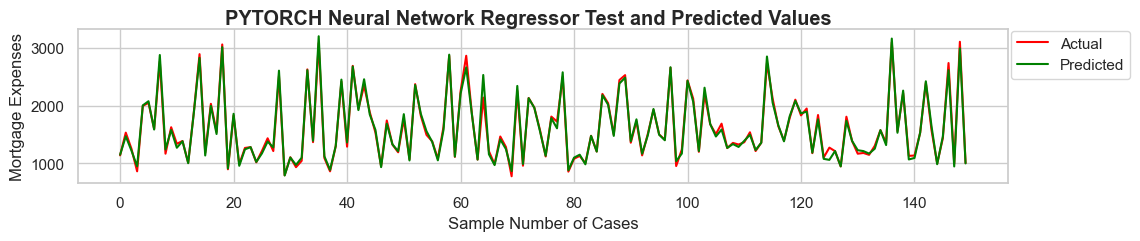

In [101]:
################################################################################################################################
# plot the graph of PYTORCH actual and predicted values
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(12,2))
ax = range(len(y_test_list[0:150]))
plt.plot(ax, y_test_list[0:150], color='red',label="Actual")
plt.plot(ax, y_pred_list[0:150], color='green',label="Predicted")
plt.suptitle("PYTORCH Neural Network Regressor Test and Predicted Values",fontweight='bold')
plt.xlabel('Sample Number of Cases')
plt.ylabel('Mortgage Expenses')
plt.legend(bbox_to_anchor=(0.64, .54, 0.5, 0.5))
plt.show()

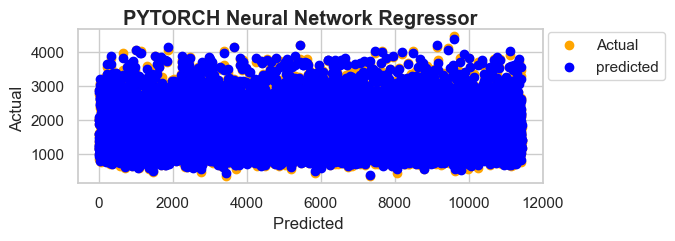

In [102]:
################################################################################################################################
# plot the Scatter plot of PYTORCH actualtrue and predicted values
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
ax = range(len(y_test_list))
ax1 = range(len(y_pred_list))
plt.scatter(ax,y_test_list, color='orange',label="Actual")
plt.scatter(ax1,y_pred_list, color='blue',label="predicted")
plt.suptitle("PYTORCH Neural Network Regressor ",fontweight='bold')
plt.ylabel('Actual ')
plt.xlabel('Predicted ')
plt.legend(bbox_to_anchor=(0.78, .53, 0.5, 0.5))
plt.show()

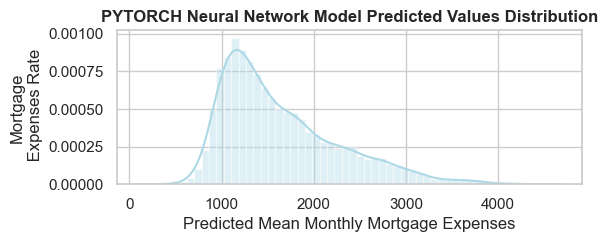

In [103]:
################################################################################################################################
# plot the PYTORCH predicted values distribution 
################################################################################################################################
plt.figure(figsize=(6,2))
sns.distplot(y_pred_list,color='lightblue',kde=True)
plt.title('PYTORCH Neural Network Model Predicted Values Distribution',fontweight='bold')
plt.xlabel('Predicted Mean Monthly Mortgage Expenses')
plt.ylabel('Mortgage\n Expenses Rate')
plt.show()

In [104]:
################################################################################################################################
# pysically compare the true and predicted first 10 values
################################################################################################################################

pd.DataFrame({'Actual values ': y_test_list, 'Predicted values ': y_pred_list}).head(10)


,Actual values,Predicted values
0,1139.245483,1151.037109
1,1533.259888,1469.161987
2,1254.544678,1221.613647
3,862.657654,949.031067
4,1996.414307,2005.909424
5,2050.766113,2077.955566
6,1598.175049,1587.560547
7,2767.929199,2879.745361
8,1168.363037,1241.007324
9,1627.066040,1579.715942


In [105]:
printmd('Conclusion: KERAS and PYTORCH performance is almost same; with PYTORCH Regression being little better.')

## <span style="color:blue">Conclusion: KERAS and PYTORCH performance is almost same; with PYTORCH Regression being little better.</span>